# Decision Tree - with Imbalanced Data from StandardScaler

## Grid search with different parameters

Various parameters and values are tested by a grid search and scored against either the 'f1', 'recall' or 'specificity' scoring metric.


### Load Packages

In [1]:
import pickle
from datetime import datetime as dt
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc

### Load data

In [2]:
# import dataset from pickle
X_train, X_test, y_train, y_test = pickle.load( open( "../../pickles/intercorr_app2_StandardScaler_20210711_214851.pickle", "rb" ) )

### Grid search
#### Define parameter grid and scoring metric

In [3]:
grid = {'max_depth' : [int(x) for x in np.linspace(5, 10, num = 6)], 
        # 'min_samples_split' : [int(x) for x in np.linspace(2, 20, num = 10)],
        # 'min_samples_leaf' : [int(x) for x in np.linspace(1, 8, num = 8)],
         'min_weight_fraction_leaf' : [float(x) for x in np.linspace(0, 0.15, num = 5)],
         'min_impurity_decrease' : [float(x) for x in np.linspace(0, 0.015, num = 5)],
        #'class_weight' : [{0:float("{0:.2f}".format(x)), 1:1-float("{0:.2f}".format(x))} for x in np.linspace(0, 1, num = 11)],
          'criterion' : ['entropy', 'gini'],
          'splitter' : ['best', 'random']
        }


scoring = {'f1' : 'f1',
           'recall': 'recall',
           #'precision' : 'precision',
           'specificity' : make_scorer(recall_score, pos_label=0),
           }

#### Run grid search

In [4]:
grid_results = {}

In [5]:
start = dt.now()

for sco, sc in scoring.items():
    clf = GridSearchCV(DecisionTreeClassifier(random_state=78), grid, cv=StratifiedKFold(12), scoring=sc, n_jobs=-1)
    clf.fit(X_train, y_train)
    grid_results[sco] = clf
    
end = dt.now()
diff = end-start

print('Duration of calculations: %s' %diff)

Duration of calculations: 1:00:35.867898


#### Best estimator

In [9]:
for k,v in grid_results.items():
    print(str(k) + '-score: %s\n'  %grid_results[k].best_estimator_)

f1-score: DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.015,
                       random_state=78, splitter='random')

recall-score: DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.015,
                       random_state=78, splitter='random')

specificity-score: DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=78,
                       splitter='random')



### Save Results

In [10]:
out = grid_results
timestamp = dt.now().strftime("%Y%m%d_%H%M%S")
filename = '../../pickles/DT_Standard_grid_%s.pickle' %timestamp
filehandler = open(filename, 'wb')
pickle.dump(out, filehandler)

### Representation of Results

Optimized for f1-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.5
Accuracy :  0.742671009771987
f1-score :  0.8523364485981308
Recall :  1.0
Specificity :  0.0
---------------

Optimized for f1-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.5
Accuracy :  0.7272727272727273
f1-score :  0.8421052631578948
Recall :  1.0
Specificity :  0.0


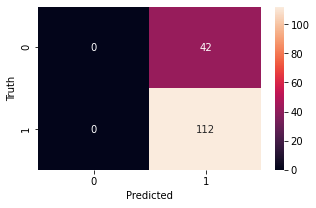




Optimized for recall-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.5
Accuracy :  0.742671009771987
f1-score :  0.8523364485981308
Recall :  1.0
Specificity :  0.0
---------------

Optimized for recall-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.5
Accuracy :  0.7272727272727273
f1-score :  0.8421052631578948
Recall :  1.0
Specificity :  0.0


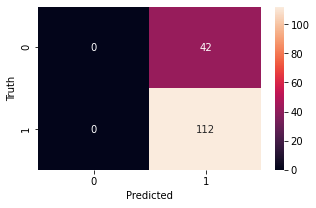




Optimized for specificity-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.9038141239173885
Accuracy :  0.9185667752442996
f1-score :  0.9445676274944568
Recall :  0.9342105263157895
Specificity :  0.8734177215189873
---------------

Optimized for specificity-score: -- Confusion Matrix and External Evaluation 

Balanced Accuracy:  0.6145833333333334
Accuracy :  0.6883116883116883
f1-score :  0.7837837837837838
Recall :  0.7767857142857143
Specificity :  0.4523809523809524


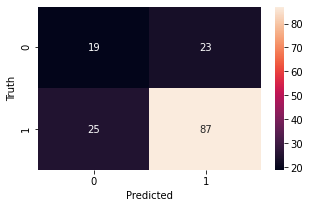

In [11]:
for k,v in grid_results.items():

    print('============================================================================')
    print('Optimized for %s-score: -- Confusion Matrix and External Evaluation \n' %(k))
    y_predicted = grid_results[k].predict(X_train)
    print('Balanced Accuracy: ', balanced_accuracy_score(y_train, y_predicted))
    print('Accuracy : ', accuracy_score(y_train, y_predicted))
    print('f1-score : ', f1_score(y_train, y_predicted))
    print('Recall : ' , recall_score(y_train, y_predicted))

    print('Specificity : ', recall_score(y_train, y_predicted, pos_label=0) )
    print('---------------\n')

    print('Optimized for %s-score: -- Confusion Matrix and External Evaluation \n' %(k))
    y_predicted = grid_results[k].predict(X_test)
    cm1 = confusion_matrix(y_test, y_predicted)
    
    print('Balanced Accuracy: ', balanced_accuracy_score(y_test, y_predicted))
    print('Accuracy : ', accuracy_score(y_test, y_predicted))
    print('f1-score : ', f1_score(y_test, y_predicted))
    print('Recall : ' , recall_score(y_test, y_predicted))


    print('Specificity : ', recall_score(y_test, y_predicted, pos_label=0) )

    # Visualize it as a heatmap
    import matplotlib.pyplot as plt
    import seaborn as sn
    plt.figure(figsize=(5,3))
    sn.heatmap(cm1,annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print('\n\n')